## Importaciónde librerías

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gudhi as gd
import calendar
import ripser
import persim
import matplotlib.style as style


import gtda
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters 
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import BettiCurve



sns.set_theme(style="darkgrid")
#style.use('fivethirtyeight')

## Lectura de datos

In [96]:
df1 = pd.read_csv("[Datos]\SOI.csv")
df2 = pd.read_csv("[Datos]\SOI_OLR.csv")
df3 = pd.read_csv("[Datos]\Full.csv")

df1["Date"] = pd.to_datetime(df1["Date"])
df2["Date"] = pd.to_datetime(df2["Date"])
df3["Date"] = pd.to_datetime(df3["Date"])
df3["month"] = df3['Date'].map(lambda x: x.month)
df3["year"] = df3['Date'].map(lambda x: x.year)
df3['month'] = df3['month'].apply(lambda x: calendar.month_abbr[x])

### Visualización series de tiempo

<Axes: xlabel='Date', ylabel='OLR'>

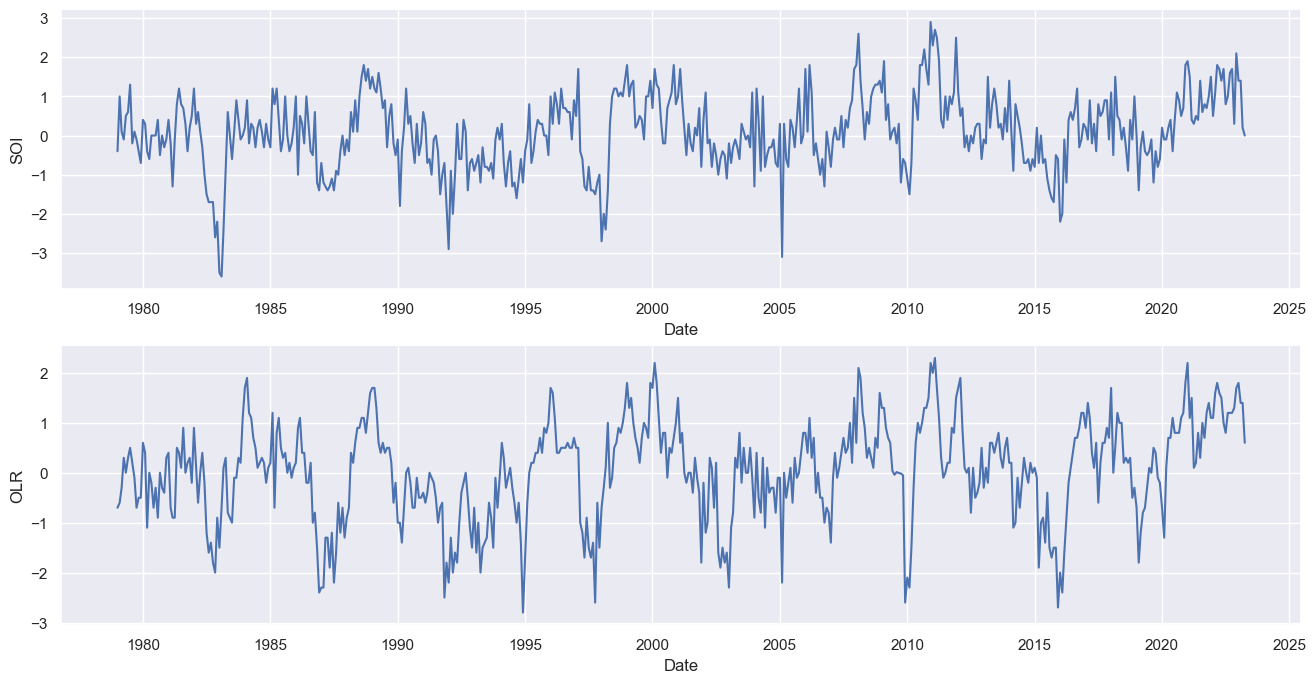

In [97]:
fig, ax = plt.subplots(2, figsize = (16,8))

sns.lineplot(data = df2, x = "Date", y = "SOI", ax = ax[0])
sns.lineplot(data = df2, x = "Date", y = "OLR", ax = ax[1])


<Axes: xlabel='Date', ylabel='Nino3.4'>

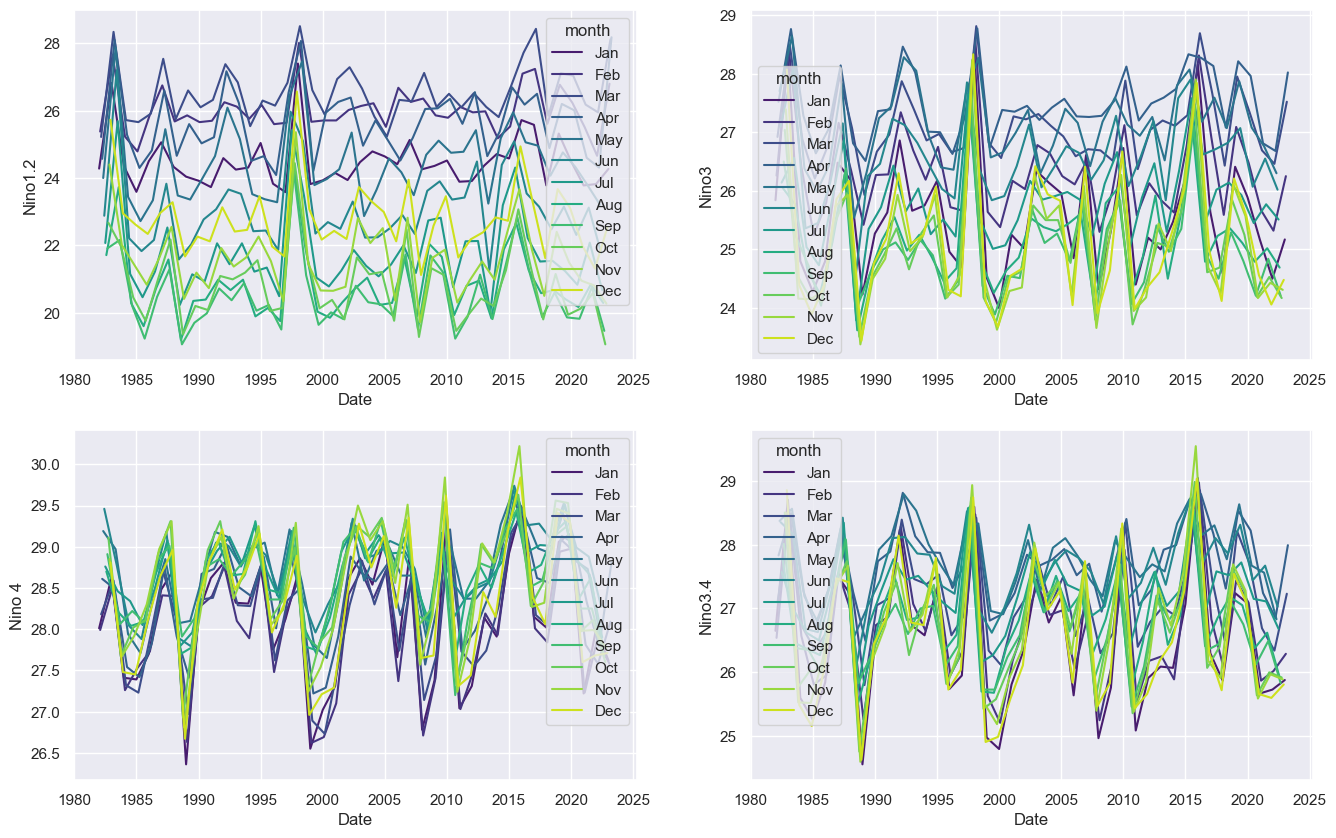

In [98]:
fig, ax = plt.subplots(2,2, figsize = (16,10))

sns.lineplot(ax = ax[0,0], data = df3, x="Date", y="Nino1.2", hue="month", palette="viridis")

sns.lineplot(ax = ax[0,1], data = df3, x="Date", y="Nino3", hue="month", palette="viridis")

sns.lineplot(ax = ax[1,0], data = df3, x="Date", y="Nino 4", hue="month", palette="viridis")

sns.lineplot(ax = ax[1,1], data = df3, x="Date", y="Nino3.4", hue="month", palette="viridis")


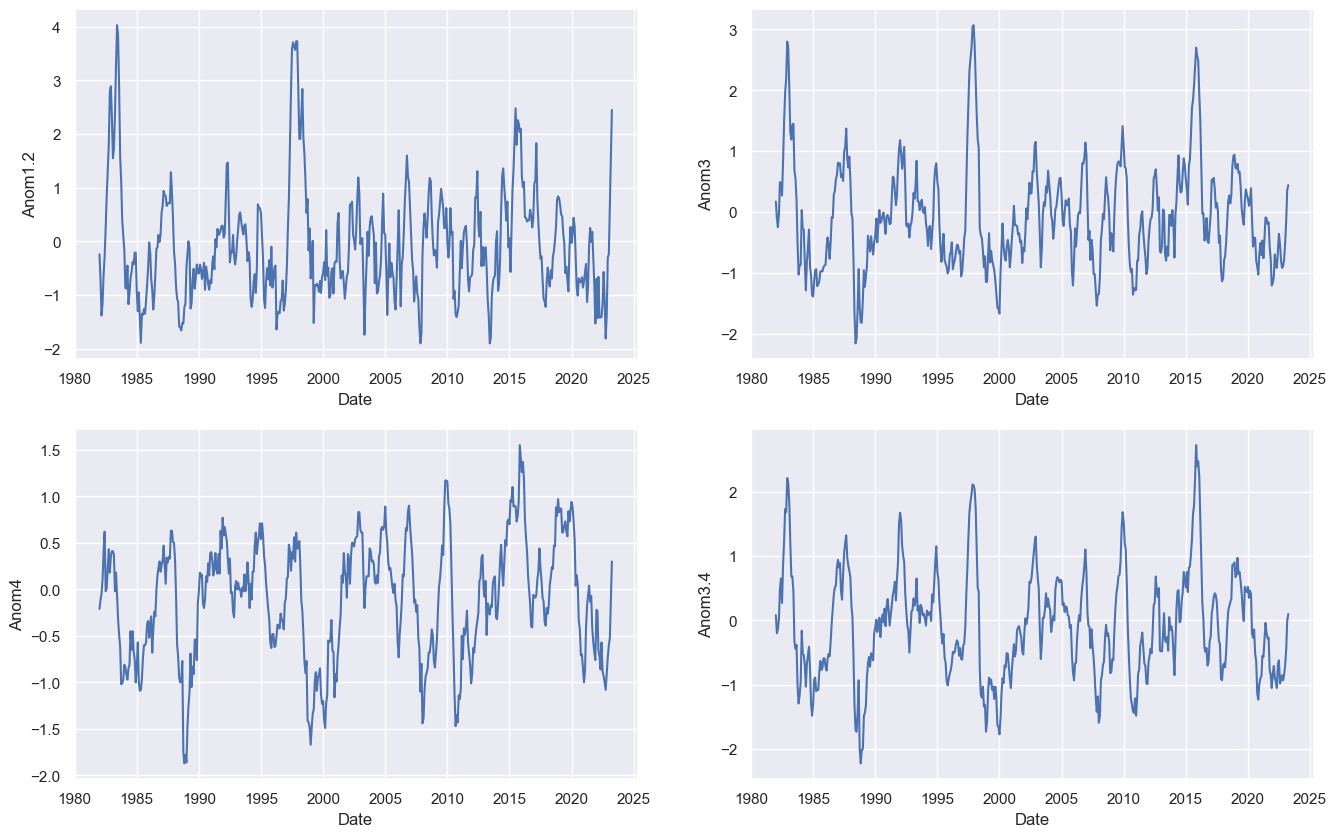

In [99]:
fig, ax = plt.subplots(2,2, figsize = (16,10))

a = sns.lineplot(ax = ax[0,0], data = df3, x="Date", y="Anom1.2")

b = sns.lineplot(ax = ax[0,1], data = df3, x="Date", y="Anom3")

c = sns.lineplot(ax = ax[1,0], data = df3, x="Date", y="Anom4")

d = sns.lineplot(ax = ax[1,1], data = df3, x="Date", y="Anom3.4")


### Tekkens Embedding

In [100]:
SOI = pd.Series(df1["SOI"])
x = SOI.index
y = [SOI[i] for i in x]

delay, dim = gtda.time_series.takens_embedding_optimal_parameters(y, 200, 10)
embedding = SingleTakensEmbedding(parameters_type="fixed", time_delay=delay, dimension=dim, stride = 2)
y_embedded = embedding.fit_transform(y)

y_periodic_embedded = y_embedded[None, :, :]
homology_dimensions = [0, 1, 2]

SOI_persistence = VietorisRipsPersistence(homology_dimensions=homology_dimensions, n_jobs=1)

print("Diagrama de persistencia para encaje de Tekkens (SOI)")
SOI_PG = SOI_persistence.fit_transform_plot(y_periodic_embedded)


Diagrama de persistencia para encaje de Tekkens (SOI)


In [101]:
BCurve = BettiCurve()
bc = SOI_persistence.fit_transform(y_periodic_embedded)

print("Curva de Betti (SOI)")
SOI_BC = BCurve.fit_transform_plot(bc)

Curva de Betti (SOI)


In [102]:
OLR = pd.Series(df2["OLR"])
x = OLR.index
y = [OLR[i] for i in x]

delay, dim = gtda.time_series.takens_embedding_optimal_parameters(y, 200, 10)
embedding = SingleTakensEmbedding(parameters_type="fixed", time_delay=delay, dimension=dim, stride=2)

y_embedded = embedding.fit_transform(y)
y_periodic_embedded = y_embedded[None, :, :]
homology_dimensions = [0, 1, 2]

OLR_persistence = VietorisRipsPersistence(homology_dimensions=homology_dimensions, n_jobs=1)

print("Diagrama de persistencia para encaje de Tekkens (OLR)")
OLR_PD = OLR_persistence.fit_transform_plot(y_periodic_embedded)

Diagrama de persistencia para encaje de Tekkens (OLR)


In [103]:
BCurve = BettiCurve()
bc = OLR_persistence.fit_transform(y_periodic_embedded)

print("Curva de Betti (OLR)")
OLR_BC = BCurve.fit_transform_plot(bc)

Curva de Betti (OLR)


In [104]:
anom34 = pd.Series(df3["Anom3.4"])

x = anom34.index
y = [anom34[i] for i in x]

delay, dim = gtda.time_series.takens_embedding_optimal_parameters(y, 200, 10)
embedding = SingleTakensEmbedding(parameters_type="fixed", time_delay=delay, dimension=dim, stride=2)

y_embedded = embedding.fit_transform(y)
y_periodic_embedded = y_embedded[None, :, :]
homology_dimensions = [0, 1, 2]

Anom34_persistence = VietorisRipsPersistence(homology_dimensions=homology_dimensions, n_jobs=1)

print("Diagrama de persistencia para encaje de Tekkens (OLR)")
Anom34PD = Anom34_persistence.fit_transform_plot(y_periodic_embedded)

Diagrama de persistencia para encaje de Tekkens (OLR)


In [105]:
BCurve = BettiCurve()
bc = Anom34_persistence.fit_transform(y_periodic_embedded)

print("Curva de Betti (Anom 3.4)")
Anom34_BC = BCurve.fit_transform_plot(bc)

Curva de Betti (Anom 3.4)


# Suavización de SOI

### Simple Moving Average y Exponential Moving Average (3 meses)

<Axes: xlabel='Date', ylabel='SOI (EMA)'>

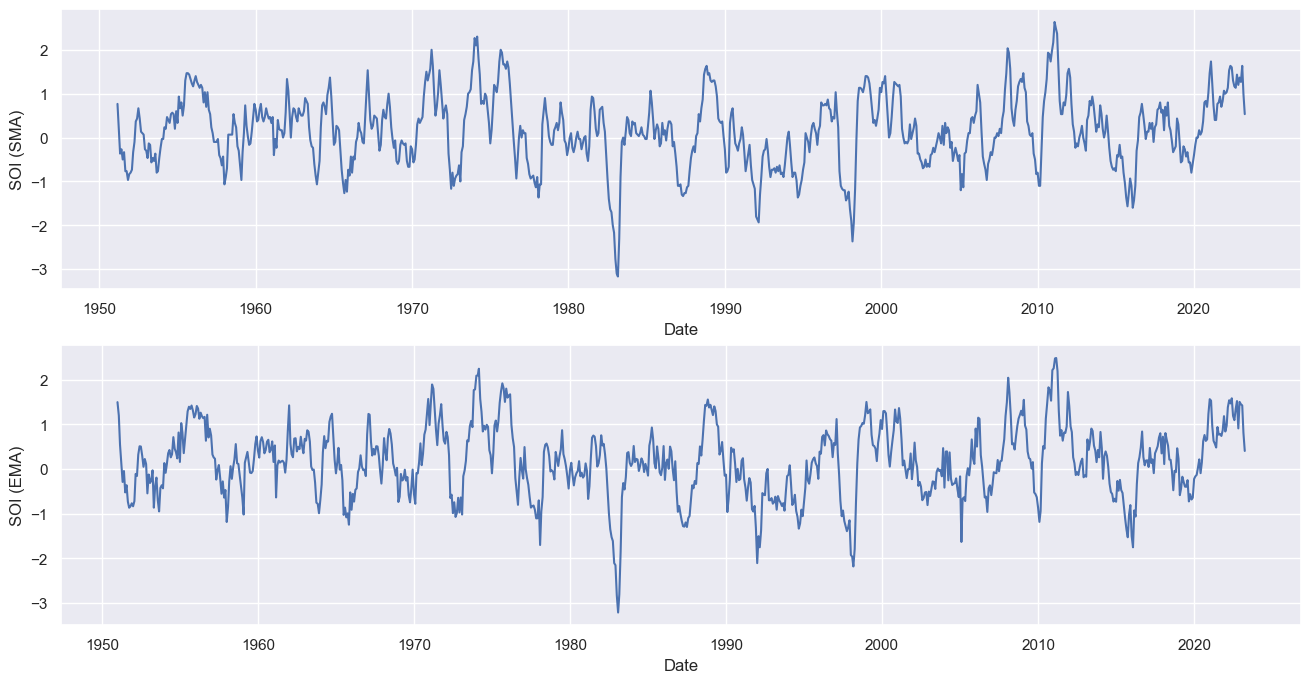

In [106]:
# Ventana de 3 meses
df1["SOI (SMA)"] = df1['SOI'].rolling(3).mean()
df1["SOI (EMA)"] = df1['SOI'].ewm(span=3, adjust=False).mean()

fig, ax = plt.subplots(2, figsize = (16,8))

sns.lineplot(data = df1, x = "Date", y = "SOI (SMA)", ax = ax[0])
sns.lineplot(data = df1, x = "Date", y = "SOI (EMA)", ax = ax[1])



In [107]:
smaSOI = pd.Series(df1["SOI (SMA)"])
x = smaSOI.dropna().index
y = [smaSOI[i] for i in x]

delay, dim = gtda.time_series.takens_embedding_optimal_parameters(y, 200, 10)
embedding = SingleTakensEmbedding(parameters_type="fixed", time_delay=delay, dimension=dim, stride=2)

y_embedded = embedding.fit_transform(y)
y_periodic_embedded = y_embedded[None, :, :]
homology_dimensions = [0, 1, 2]

smaSOI_persistence = VietorisRipsPersistence(homology_dimensions=homology_dimensions, n_jobs=1)

print("Diagrama de persistencia para encaje de Tekkens (SOI (SMA))")
smaSOI_PD = smaSOI_persistence.fit_transform_plot(y_periodic_embedded)

Diagrama de persistencia para encaje de Tekkens (SOI (SMA))


In [108]:
emaSOI = pd.Series(df1["SOI (EMA)"])
x = emaSOI.dropna().index
y = [emaSOI[i] for i in x]

delay, dim = gtda.time_series.takens_embedding_optimal_parameters(y, 200, 10)
embedding = SingleTakensEmbedding(parameters_type="fixed", time_delay=delay, dimension=dim, stride=2)

y_embedded = embedding.fit_transform(y)
y_periodic_embedded = y_embedded[None, :, :]
homology_dimensions = [0, 1, 2]

emaSOI_persistence = VietorisRipsPersistence(homology_dimensions=homology_dimensions, n_jobs=1)

print("Diagrama de persistencia para encaje de Tekkens (SOI (EMA))")
emaSOI_PD = emaSOI_persistence.fit_transform_plot(y_periodic_embedded)

Diagrama de persistencia para encaje de Tekkens (SOI (EMA))


# Suavización de OLR

### Simple Moving Average y Exponential Moving Average (3 meses)

<Axes: xlabel='Date', ylabel='OLR (EMA)'>

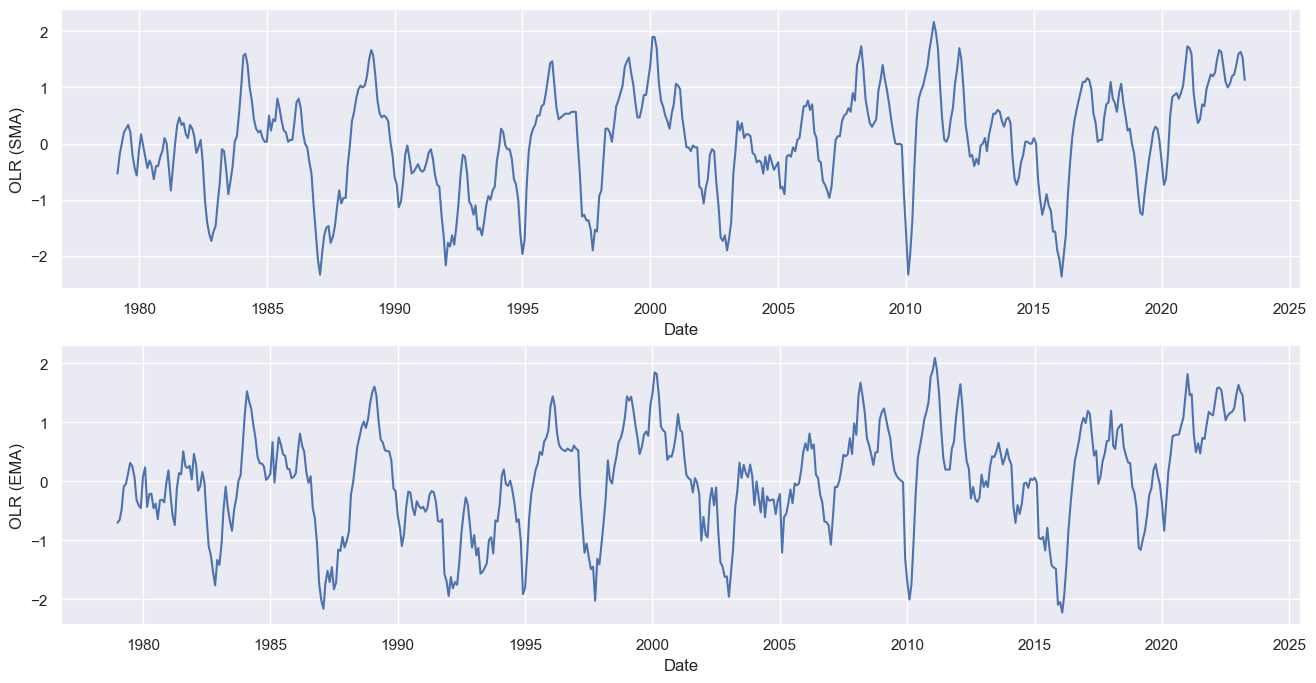

In [109]:
# Ventana de 3 meses
df2["OLR (SMA)"] = df2['OLR'].rolling(3).mean()
df2["OLR (EMA)"] = df2['OLR'].ewm(span=3, adjust=False).mean()

fig, ax = plt.subplots(2, figsize = (16,8))

sns.lineplot(data = df2, x = "Date", y = "OLR (SMA)", ax = ax[0])
sns.lineplot(data = df2, x = "Date", y = "OLR (EMA)", ax = ax[1])


In [110]:
smaOLR = pd.Series(df2["OLR (SMA)"])
x = smaOLR.dropna().index
y = [smaOLR[i] for i in x]

delay, dim = gtda.time_series.takens_embedding_optimal_parameters(y, 200, 10)
embedding = SingleTakensEmbedding(parameters_type="fixed", time_delay=delay, dimension=dim, stride=2)

y_embedded = embedding.fit_transform(y)
y_periodic_embedded = y_embedded[None, :, :]
homology_dimensions = [0, 1, 2]

smaOLR_persistence = VietorisRipsPersistence(homology_dimensions=homology_dimensions, n_jobs=1)

print("Diagrama de persistencia para encaje de Tekkens (OLR (SMA))")
smaOLR_PD = smaOLR_persistence.fit_transform_plot(y_periodic_embedded)

Diagrama de persistencia para encaje de Tekkens (OLR (SMA))


In [111]:
emaOLR = pd.Series(df2["OLR (EMA)"])
x = emaOLR.dropna().index
y = [emaOLR[i] for i in x]

delay, dim = gtda.time_series.takens_embedding_optimal_parameters(y, 200, 10)
embedding = SingleTakensEmbedding(parameters_type="fixed", time_delay=delay, dimension=dim, stride=2)

y_embedded = embedding.fit_transform(y)
y_periodic_embedded = y_embedded[None, :, :]
homology_dimensions = [0, 1, 2]

emaOLR_persistence = VietorisRipsPersistence(homology_dimensions=homology_dimensions, n_jobs=1)

print("Diagrama de persistencia para encaje de Tekkens (OLR (SMA))")
emaOLR_PD = emaOLR_persistence.fit_transform_plot(y_periodic_embedded)

Diagrama de persistencia para encaje de Tekkens (OLR (SMA))


### Comparacion diagramas de persistencia entre Anom3.4 y datos suavizados

In [112]:
smaOLR = pd.Series(df3['OLR'].rolling(3).mean())
smaOLR = smaOLR.dropna().reset_index(drop=True)
smaSOI = pd.Series(df3['SOI'].rolling(3).mean())
smaSOI = smaSOI.dropna().reset_index(drop=True)
anom34 = pd.Series(df3["Anom3.4"])

x_OLR = smaOLR.dropna().index
y_OLR = [smaOLR[i] for i in x_OLR]

x_SOI = smaSOI.dropna().index
y_SOI = [smaSOI[i] for i in x_SOI]

x_anom = anom34.index
y_anom = [anom34[i] for i in x_anom]


delay_olr, dim_olr = gtda.time_series.takens_embedding_optimal_parameters(y_OLR, 200, 10)
delay_soi, dim_soi = gtda.time_series.takens_embedding_optimal_parameters(y_SOI, 200, 10)
delay_anom, dim_anom = gtda.time_series.takens_embedding_optimal_parameters(y_anom, 200, 10)

embedding_olr = SingleTakensEmbedding(parameters_type="fixed", time_delay=delay_olr, dimension=dim_olr, stride=2)
embedding_soi = SingleTakensEmbedding(parameters_type="fixed", time_delay=delay_soi, dimension=dim_soi, stride=2)
embedding_anom = SingleTakensEmbedding(parameters_type="fixed", time_delay=delay_anom, dimension=dim_anom, stride=2)


y_embedded_olr = embedding_olr.fit_transform(y_OLR)
y_embedded_soi = embedding_olr.fit_transform(y_SOI)
y_embedded_anom = embedding_olr.fit_transform(y_anom)

OLR_embed = y_embedded_olr[None, :, :]
SOI_embed = y_embedded_soi[None, :, :]
anom_embed = y_embedded_anom[None, :, :]

homology_dimensions = [0, 1]


PD = VietorisRipsPersistence(homology_dimensions=homology_dimensions, n_jobs=1)


OLR_pd = PD.fit_transform(OLR_embed)
SOI_pd = PD.fit_transform(SOI_embed)
anom_pd = PD.fit_transform(anom_embed)


<Axes: xlabel='Date', ylabel='Anom3.4'>

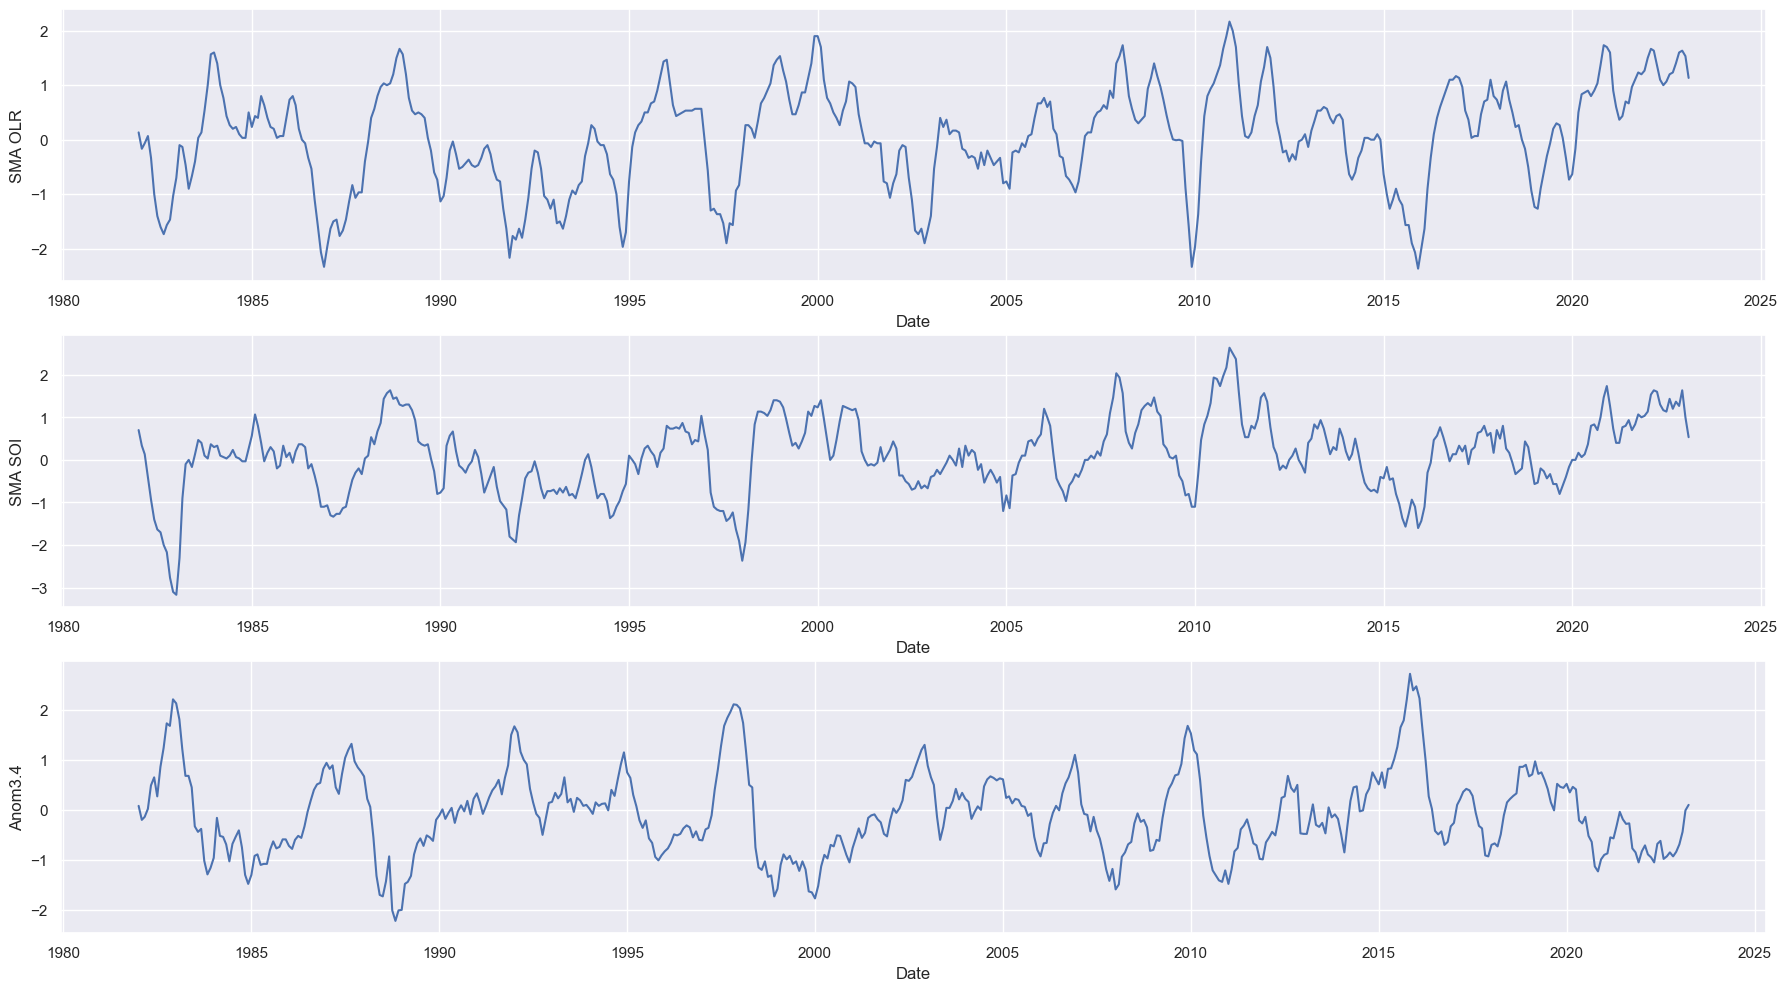

In [113]:

df3["SMA OLR"] = smaOLR
df3["SMA SOI"] = smaSOI

fig, ax = plt.subplots(3, figsize = (22,12))

sns.lineplot(data = df3, x = "Date", y = "SMA OLR", ax = ax[0])
sns.lineplot(data = df3, x = "Date", y = "SMA SOI", ax = ax[1])
sns.lineplot(data = df3, x = "Date", y = "Anom3.4", ax = ax[2])

In [114]:
OLR_pdg = PD.fit_transform_plot(OLR_embed)
SOI_pdg = PD.fit_transform_plot(SOI_embed)
anom_pdg = PD.fit_transform_plot(anom_embed)

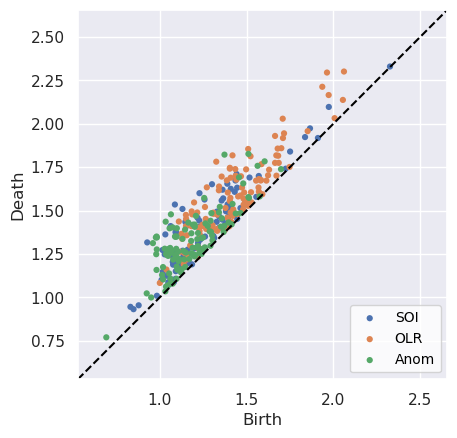

In [115]:
SOI_dgm = ripser.ripser(np.squeeze(SOI_embed))['dgms'][1]
OLR_dgm = ripser.ripser(np.squeeze(OLR_embed))['dgms'][1]
anom_dgm = ripser.ripser(np.squeeze(anom_embed))['dgms'][1]
persim.plot_diagrams([SOI_dgm, OLR_dgm, anom_dgm], labels = ["SOI", "OLR", "Anom"])


La distancia Bottleneck entre los diagramas de persistencia para Betti 1 entre SOI y OLR es 0.16581136


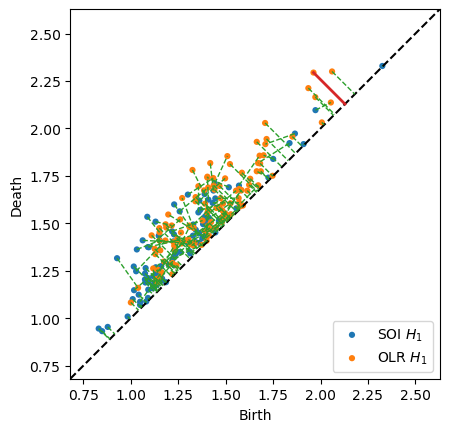

In [116]:
distance_bottleneck, matching = persim.bottleneck(SOI_dgm, OLR_dgm, matching=True)
print(f"La distancia Bottleneck entre los diagramas de persistencia para Betti 1 entre SOI y OLR es {round(distance_bottleneck, 8)}")
persim.bottleneck_matching(SOI_dgm, OLR_dgm, matching, labels=['SOI $H_1$', 'OLR $H_1$'])

La distancia Bottleneck entre los diagramas de persistencia para Betti 1 entre SOI y Anom 3.4 es 0.127


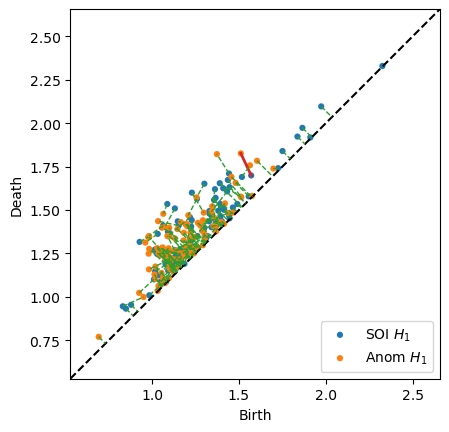

In [117]:
distance_bottleneck, matching = persim.bottleneck(SOI_dgm, anom_dgm, matching=True)
print(f"La distancia Bottleneck entre los diagramas de persistencia para Betti 1 entre SOI y Anom 3.4 es {round(distance_bottleneck, 3)}")
persim.bottleneck_matching(SOI_dgm, anom_dgm, matching, labels=['SOI $H_1$', 'Anom $H_1$'])

La distancia Bottleneck entre los diagramas de persistencia para Betti 1 entre OLR y Anom 3.4 es 0.166


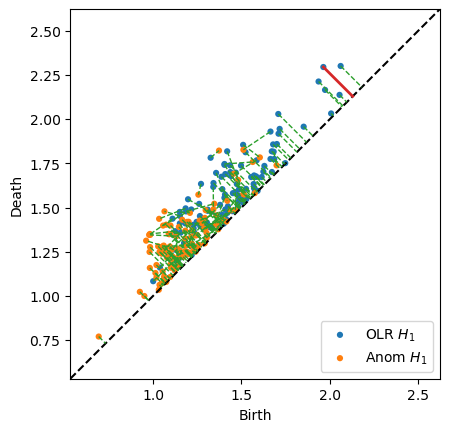

In [118]:
distance_bottleneck, matching = persim.bottleneck(OLR_dgm, anom_dgm, matching=True)
print(f"La distancia Bottleneck entre los diagramas de persistencia para Betti 1 entre OLR y Anom 3.4 es {round(distance_bottleneck, 3)}")
persim.bottleneck_matching(OLR_dgm, anom_dgm, matching, labels=['OLR $H_1$', 'Anom $H_1$'])

La distancia Wasserstein entre los diagramas de persistencia para Betti 1 entre SOI y OLR es 8.435


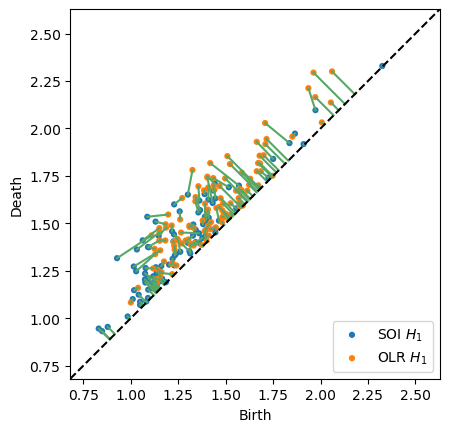

In [119]:
distance_wasserstein, matching = persim.wasserstein(SOI_dgm, OLR_dgm, matching=True)
print(f"La distancia Wasserstein entre los diagramas de persistencia para Betti 1 entre SOI y OLR es {round(distance_wasserstein, 3)}")
persim.wasserstein_matching(SOI_dgm, OLR_dgm, matching, labels=['SOI $H_1$', 'OLR $H_1$'])

La distancia Wasserstein entre los diagramas de persistencia para Betti 1 entre SOI y Anom 3.4 es 6.712


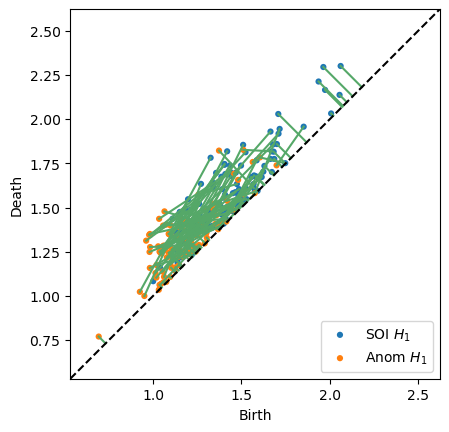

In [120]:
distance_wasserstein, matching = persim.wasserstein(SOI_dgm, anom_dgm, matching=True)
print(f"La distancia Wasserstein entre los diagramas de persistencia para Betti 1 entre SOI y Anom 3.4 es {round(distance_wasserstein, 3)}")
persim.wasserstein_matching(OLR_dgm, anom_dgm, matching, labels=['SOI $H_1$', 'Anom $H_1$'])

La distancia Wasserstein entre los diagramas de persistencia para Betti 1 entre OLR y Anom 3.4 es 12.419


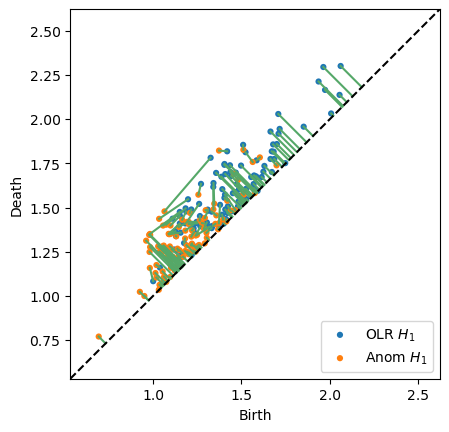

In [121]:
distance_wasserstein, matching = persim.wasserstein(OLR_dgm, anom_dgm, matching=True)
print(f"La distancia Wasserstein entre los diagramas de persistencia para Betti 1 entre OLR y Anom 3.4 es {round(distance_wasserstein, 3)}")
persim.wasserstein_matching(OLR_dgm, anom_dgm, matching, labels=['OLR $H_1$', 'Anom $H_1$'])

In [122]:
"""smaSOI = pd.Series(df3['SOI'].rolling(3).mean())
smaSOI = smaSOI.dropna().reset_index(drop=True)
x = smaSOI.dropna().index
y = [smaSOI[i] for i in x]

delay, dim = gtda.time_series.takens_embedding_optimal_parameters(y, 200, 10)
embedding = SingleTakensEmbedding(parameters_type="fixed", time_delay=delay, dimension=dim, stride=2)

y_embedded = embedding.fit_transform(y)
print(f"Shape of embedded time series: {y_embedded.shape}")

SOI_embed = y_embedded[None, :, :]
# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

contaminantes_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=1
)

SOI_pd = contaminantes_persistence.fit_transform(y_periodic_embedded)"""

'smaSOI = pd.Series(df3[\'SOI\'].rolling(3).mean())\nsmaSOI = smaSOI.dropna().reset_index(drop=True)\nx = smaSOI.dropna().index\ny = [smaSOI[i] for i in x]\n\ndelay, dim = gtda.time_series.takens_embedding_optimal_parameters(y, 200, 10)\nembedding = SingleTakensEmbedding(parameters_type="fixed", time_delay=delay, dimension=dim, stride=2)\n\ny_embedded = embedding.fit_transform(y)\nprint(f"Shape of embedded time series: {y_embedded.shape}")\n\nSOI_embed = y_embedded[None, :, :]\n# 0 - connected components, 1 - loops, 2 - voids\nhomology_dimensions = [0, 1, 2]\n\ncontaminantes_persistence = VietorisRipsPersistence(\n    homology_dimensions=homology_dimensions, n_jobs=1\n)\n\nSOI_pd = contaminantes_persistence.fit_transform(y_periodic_embedded)'

In [123]:
"""anom34 = pd.Series(df3["Anom3.4"])

x = anom34.index
y = [anom34[i] for i in x]

delay, dim = gtda.time_series.takens_embedding_optimal_parameters(y, 200, 10)
embedding = SingleTakensEmbedding(parameters_type="fixed", time_delay=delay, dimension=dim, stride=2)

y_embedded = embedding.fit_transform(y)
print(f"Shape of embedded time series: {y_embedded.shape}")

anom_embed = y_embedded[None, :, :]
# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

contaminantes_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=1
)
anom34_pd = contaminantes_persistence.fit_transform(y_periodic_embedded)"""

'anom34 = pd.Series(df3["Anom3.4"])\n\nx = anom34.index\ny = [anom34[i] for i in x]\n\ndelay, dim = gtda.time_series.takens_embedding_optimal_parameters(y, 200, 10)\nembedding = SingleTakensEmbedding(parameters_type="fixed", time_delay=delay, dimension=dim, stride=2)\n\ny_embedded = embedding.fit_transform(y)\nprint(f"Shape of embedded time series: {y_embedded.shape}")\n\nanom_embed = y_embedded[None, :, :]\n# 0 - connected components, 1 - loops, 2 - voids\nhomology_dimensions = [0, 1, 2]\n\ncontaminantes_persistence = VietorisRipsPersistence(\n    homology_dimensions=homology_dimensions, n_jobs=1\n)\nanom34_pd = contaminantes_persistence.fit_transform(y_periodic_embedded)'

In [124]:
pers_d = [SOI_pd, OLR_pd, anom34_pd]

from gtda.diagrams import PairwiseDistance

#dbgi = d.fit(X=p1g)
#dbgi1 = dbgi.transform(p2g)[0][0][1]
#print(f"Giotto bn: {dbgi1}")

distancias = PairwiseDistance(metric = "wasserstein")

dbg = distancias.fit(X=anom34_pd)
dbg1 = dbg.transform(SOI_pd)
dbg1

#wasser = distancias.fit_transform(pd)

NameError: name 'anom34_pd' is not defined

In [ ]:
#dgm_clean = ripser.ripser(SOI_embed)['dgms']
dgm_noisy = ripser.ripser(np.squeeze(anom_embed))['dgms']
SOI_embed.shape

prueba = np.squeeze(SOI_embed)
prueba.shape
#pers_d = np.asarray(pers_d)

dgm_clean = ripser.ripser(prueba)['dgms'][1]
dgm_noisy = ripser.ripser(np.squeeze(anom_embed))['dgms'][1]
persim.plot_diagrams([dgm_clean, dgm_noisy], labels = ["SOI", "Anom"])
distance_bottleneck, matching = persim.bottleneck(dgm_clean, dgm_noisy, matching=True)
persim.bottleneck_matching(dgm_clean, dgm_noisy, matching, labels=['Clean $H_1$', 'Noisy $H_1$'])
plt.show()
print(distance_bottleneck)
persim.bottleneck(dgm_clean, dgm_noisy)

(211, 7)